In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Credit Card Default Dataset
dataset = pd.read_csv('UCI_Credit_Card.csv')
dataset = dataset.sample(n=2000,replace =False,random_state=1)

In [3]:
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
10747,10748,310000,1,3,1,32,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12573,12574,10000,2,3,1,49,-1,-1,-2,-1,...,1690,1138,930,0,0,2828,0,182,0,1
29676,29677,50000,1,2,1,28,-1,-1,-1,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8856,8857,80000,2,3,1,52,2,2,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21098,21099,270000,1,1,2,34,1,2,0,0,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [4]:
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
23295,23296,160000,2,1,2,25,-1,0,-1,-1,...,2199,10856,0,1000,11426,2199,10000,0,9867,0
15148,15149,250000,1,1,1,53,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
18666,18667,50000,2,1,2,23,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3415,3416,200000,2,2,1,37,0,0,0,0,...,191730,171269,151550,8017,8000,8000,9000,7000,6000,0
18714,18715,420000,2,1,2,28,0,0,-1,0,...,65592,57438,31029,1010,64513,2420,1473,1062,1022,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 10747 to 18714
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          2000 non-null   int64
 1   LIMIT_BAL                   2000 non-null   int64
 2   SEX                         2000 non-null   int64
 3   EDUCATION                   2000 non-null   int64
 4   MARRIAGE                    2000 non-null   int64
 5   AGE                         2000 non-null   int64
 6   PAY_0                       2000 non-null   int64
 7   PAY_2                       2000 non-null   int64
 8   PAY_3                       2000 non-null   int64
 9   PAY_4                       2000 non-null   int64
 10  PAY_5                       2000 non-null   int64
 11  PAY_6                       2000 non-null   int64
 12  BILL_AMT1                   2000 non-null   int64
 13  BILL_AMT2                   2000 non-null   int64
 14  BILL_AMT

In [6]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,14950.749000,171825.000000,1.603000,1.853000,1.555000,35.458000,-0.024500,-0.138500,-0.179500,-0.213000,...,44390.095500,41502.586000,39643.917000,5153.111500,6.362411e+03,6096.214000,5091.073500,5043.292500,5738.555500,0.219500
std,8624.251173,131598.930521,0.489398,0.798567,0.516825,9.144892,1.103861,1.163613,1.177698,1.166753,...,65827.281839,61928.132672,60472.016246,13065.162427,4.014712e+04,21880.625777,16197.840731,16448.820691,21310.318739,0.414011
min,3.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-15306.000000,-51443.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7404.000000,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2939.500000,2158.750000,1319.250000,1000.000000,9.947500e+02,445.500000,328.250000,260.250000,166.750000,0.000000
50%,14889.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19454.000000,18652.000000,17621.500000,2022.500000,2.031500e+03,1843.000000,1597.500000,1500.000000,1464.000000,0.000000
75%,22510.250000,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,53394.250000,51005.500000,49484.750000,5000.000000,5.000000e+03,5000.000000,4295.500000,4207.750000,4000.000000,0.000000
max,29993.000000,730000.000000,2.000000,6.000000,3.000000,71.000000,6.000000,5.000000,8.000000,7.000000,...,487066.000000,489200.000000,513798.000000,276698.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,403500.000000,1.000000


There are 2,000 unique credit card clients in the dataset.

The typical credit card limit amount is approximately 171,825, but it's worth noting that this figure has a notably high standard deviation, with the maximum limit reaching as high as 730,000..

The majority of clients have an educational background that includes graduate school and university-level educatisis.





analysis).

The marital status of most clients falls into two categories: married or single.

On average, clients in the dataset are around 35.5 years old, with a standard deviation of 9.2, indicating some variability in age.

When it comes to the default payment status, a mean value of 0.219 implies that approximately 22.1% of credit card contracts are expected to default next month, which will be further examined in subsequent sections of this analysis.

In [7]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
dataset.index = dataset['ID']

In [9]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
10748,10748,310000,1,3,1,32,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,12574,10000,2,3,1,49,-1,-1,-2,-1,...,1690,1138,930,0,0,2828,0,182,0,1
29677,29677,50000,1,2,1,28,-1,-1,-1,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0


In [10]:
dataset.drop('ID',axis=1,inplace=True)

In [11]:
dataset.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0


In [12]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
dataset.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [14]:
dataset['SEX'].value_counts(dropna=False)

SEX
2    1206
1     794
Name: count, dtype: int64

In [15]:
dataset['EDUCATION'].value_counts(dropna=False)

EDUCATION
2    925
1    715
3    325
5     18
4     13
6      4
Name: count, dtype: int64

In [16]:
dataset = dataset.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [17]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

**Step2:** Data Visualisation and Analysis

Text(0.5, 1.0, 'SEX v/s COUNT')

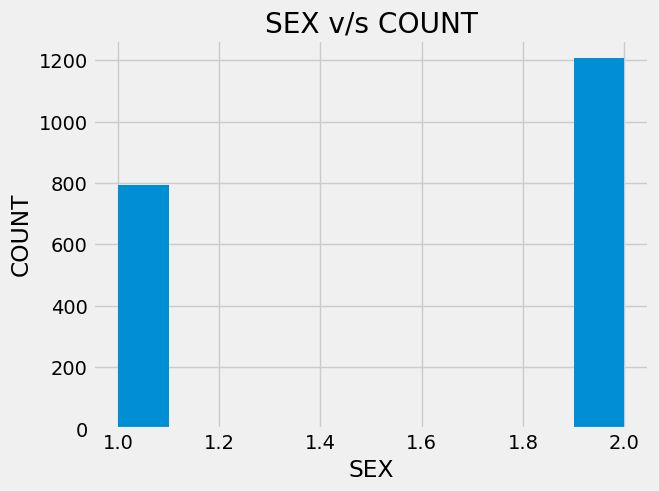

In [18]:
plt.style.use('fivethirtyeight')
dataset['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

**Number of Male credit holder is less than Female**

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

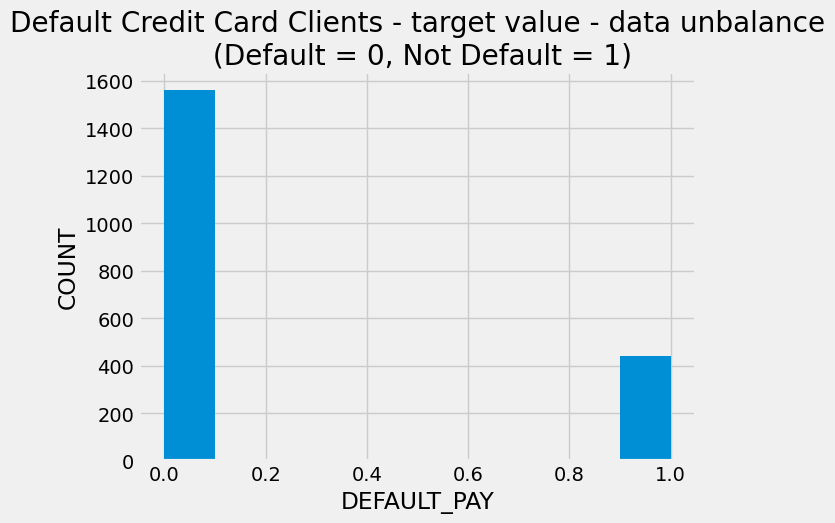

In [19]:
plt.style.use('fivethirtyeight')
dataset['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

**Defaulters Are Fewer Than Non-Defaulters in Dataset**

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

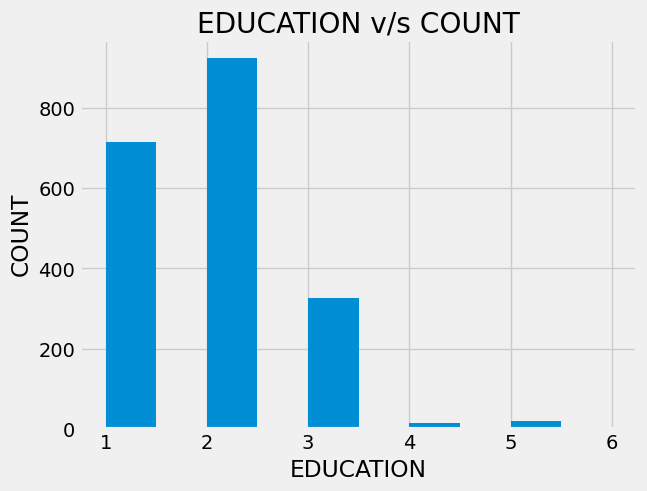

In [20]:
plt.style.use('fivethirtyeight')
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

**More number of credit holders are university students followed by Graduates and then High school students**

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

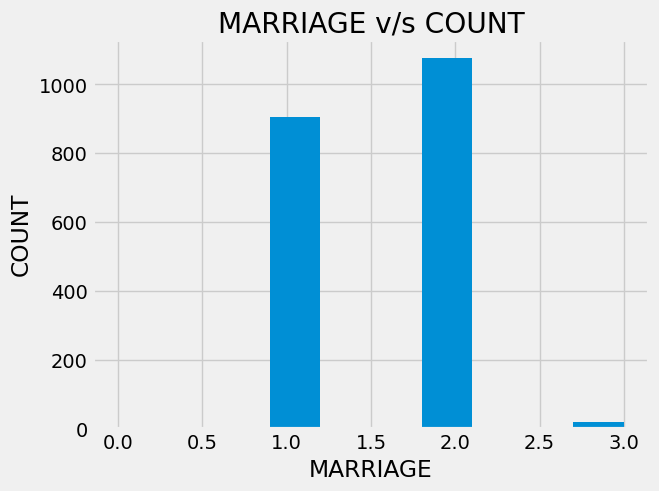

In [21]:
plt.style.use('fivethirtyeight')
dataset['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

**More number of credit cards holder are Married**

<Axes: xlabel='SEX', ylabel='LIMIT_BAL'>

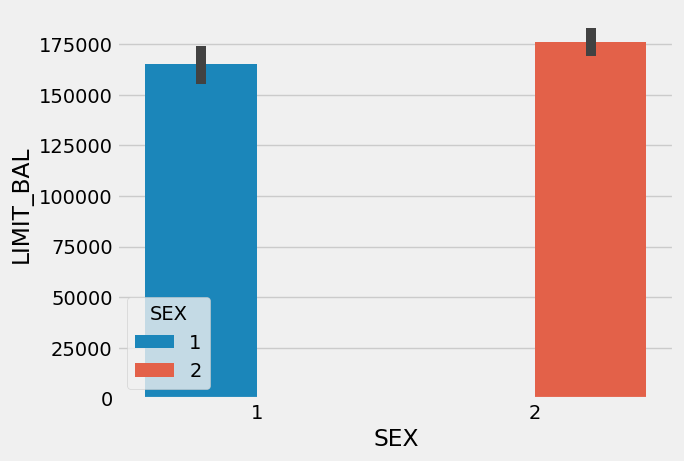

In [22]:
dataset['SEX'] = dataset['SEX'].astype(str)

sns.barplot(x='SEX',y='LIMIT_BAL',data=dataset,hue='SEX')

<Axes: xlabel='SEX', ylabel='count'>

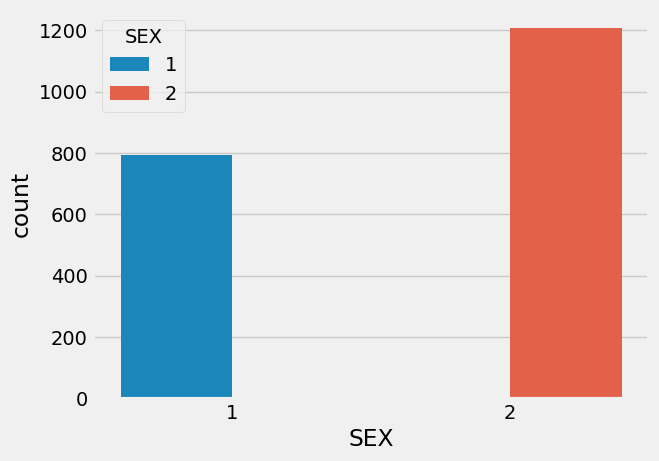

In [23]:
sns.countplot(x='SEX',data=dataset,hue = 'SEX')



In [24]:
dataset['def_pay'] = dataset['def_pay'].astype(str)


<Axes: xlabel='SEX', ylabel='count'>

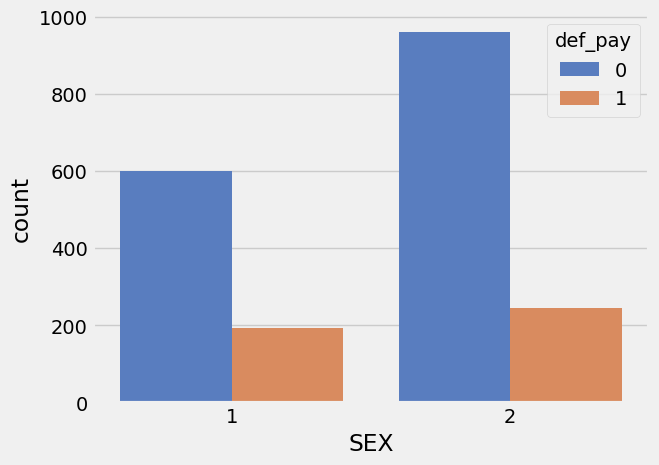

In [25]:
# Checking the number of counts of defaulters and non defaulters sexwise


sns.countplot(x='SEX', data=dataset,hue="def_pay", palette="muted") 

**It is evident from the above output that females have overall less default payments wrt males**2)

**Non-Defaults have a higher proportion of Females (Sex=2)**

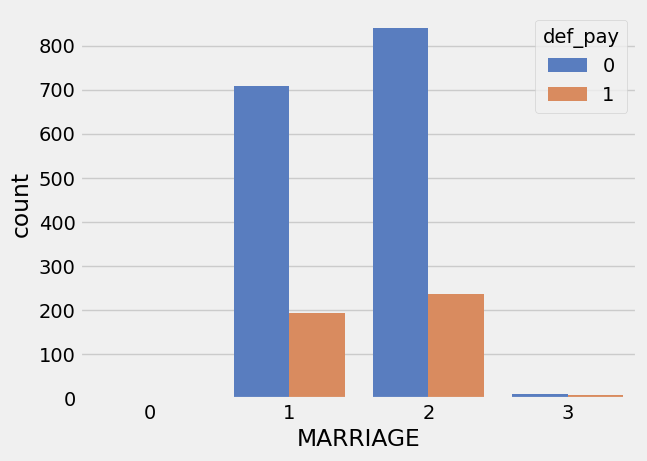

In [26]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="def_pay", palette="muted")

**From the above plot it is clear that those people who have marital status single have less default payment wrt married status people**

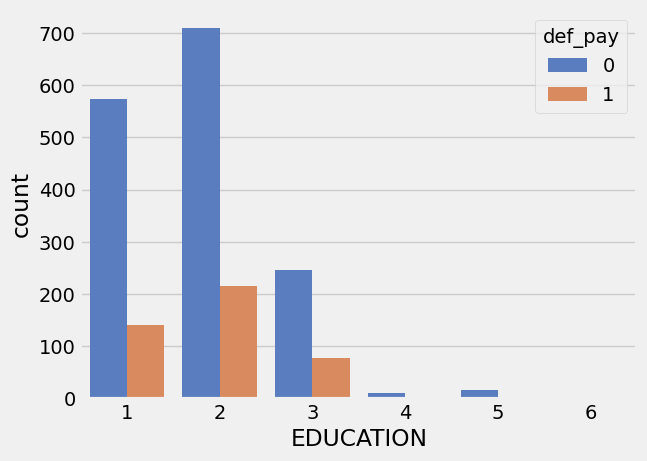

In [27]:
g=sns.countplot(x="EDUCATION", data=dataset,hue="def_pay", palette="muted")


**From the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people**

In [28]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]


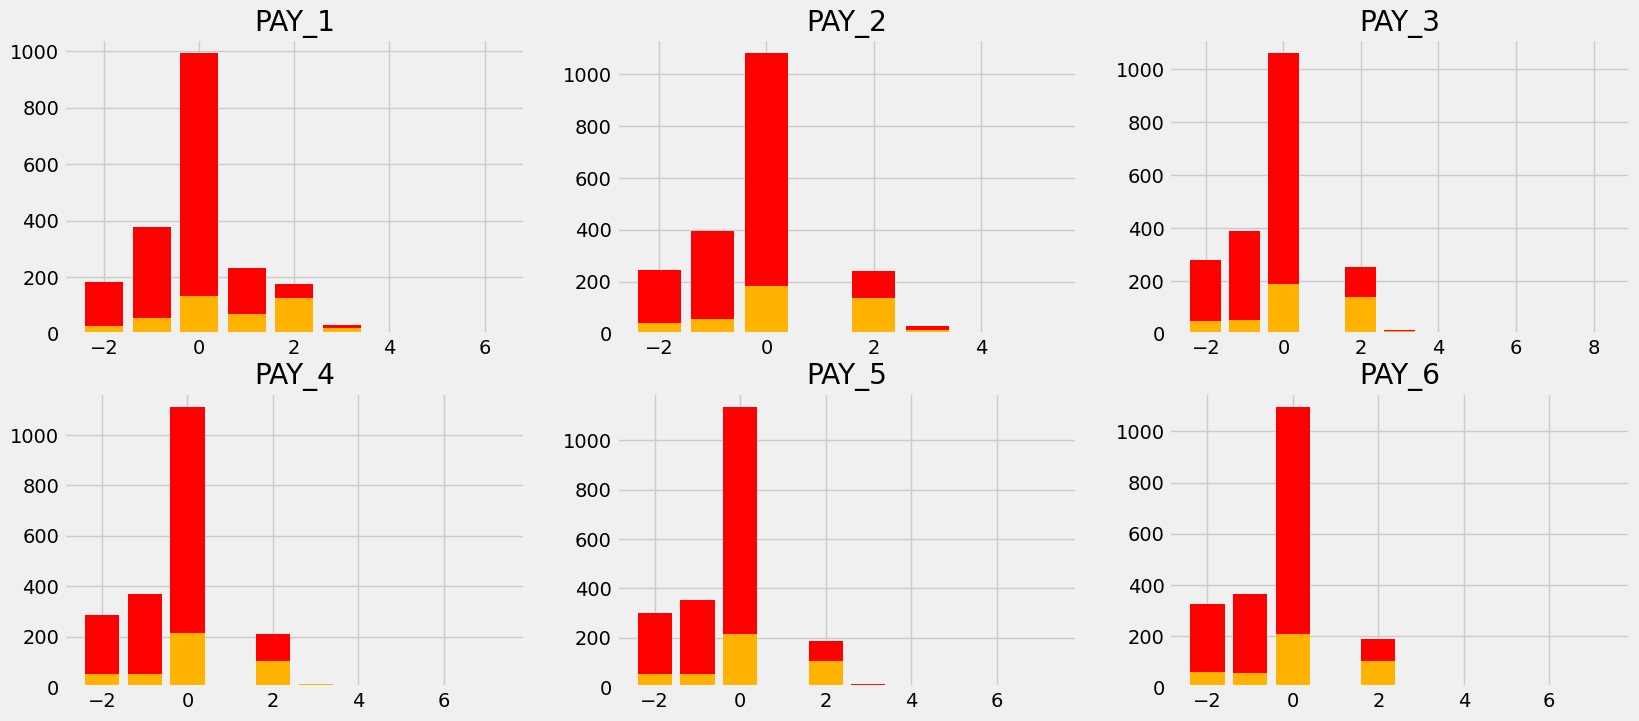

In [29]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][(dataset['def_pay']=='1')].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

**The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.**

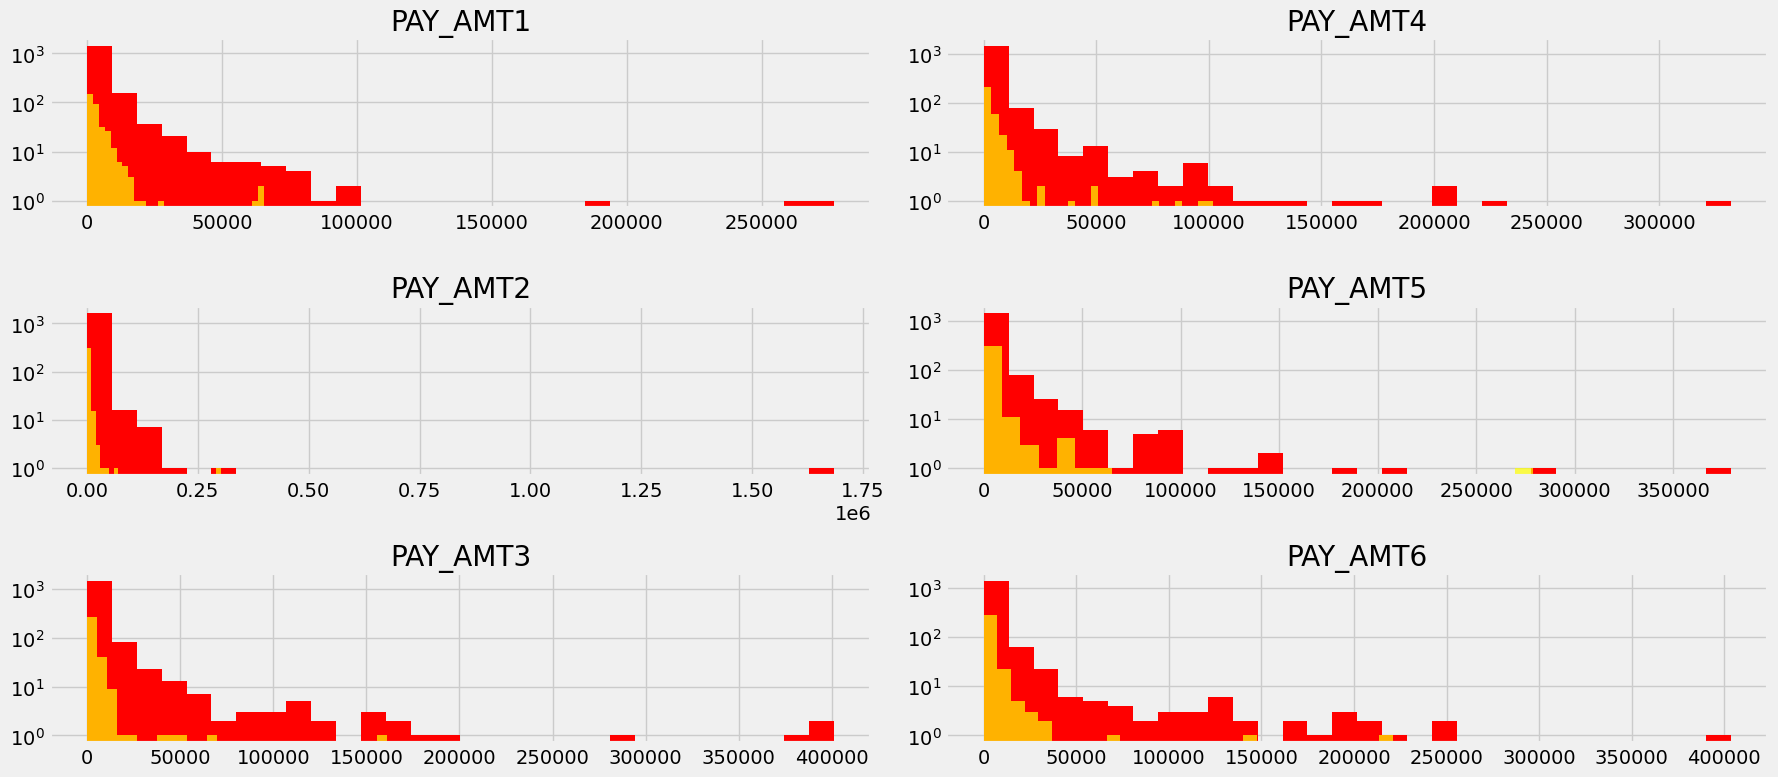

In [30]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3, 2)
figure.set_size_inches(18, 8)

for i in range(len(pay_amt_columns)):
    row, col = i % 3, int(i / 3)
    column_data = dataset[pay_amt_columns[i]]
    column_data_default = dataset[pay_amt_columns[i]][dataset['def_pay'] == '1']

    # Filter out non-positive values
    column_data = column_data[column_data > 0]
    column_data_default = column_data_default[column_data_default > 0]

    ax[row, col].hist(column_data, 30, color='red')
    ax[row, col].hist(column_data_default, 30, color='yellow', alpha=0.7)
    ax[row, col].set_title(pay_amt_columns[i])

    # Set y-scale to log
    ax[row, col].set_yscale('log')

plt.tight_layout()
plt.show()



**The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters**

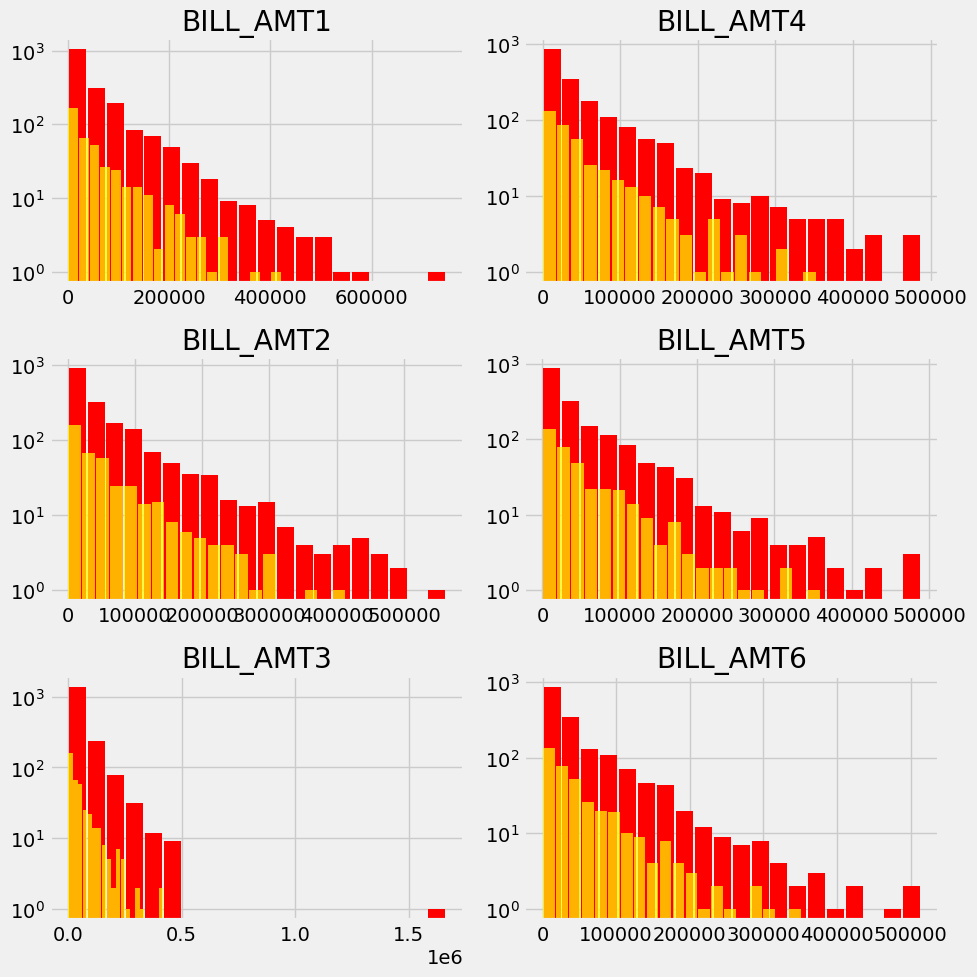

In [31]:
bill_amt_columns = getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3, 2)
figure.set_size_inches(10, 10)

for i in range(len(bill_amt_columns)):
    row, col = i % 3, int(i / 3)
    column_data = dataset[bill_amt_columns[i]]
    column_data_default = dataset[bill_amt_columns[i]][dataset['def_pay'] == '1']

    # Filter out non-positive values
    column_data = column_data[column_data > 0]
    column_data_default = column_data_default[column_data_default > 0]

    ax[row, col].hist(column_data, 20, rwidth=0.9, color='red')
    ax[row, col].hist(column_data_default, 20, rwidth=0.9, color='yellow', alpha=0.7)
    ax[row, col].set_title(bill_amt_columns[i])

    # Set y-scale to log
    ax[row, col].set_yscale('log')

plt.tight_layout()
plt.show()


**The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters**

<Axes: xlabel='def_pay', ylabel='AGE'>

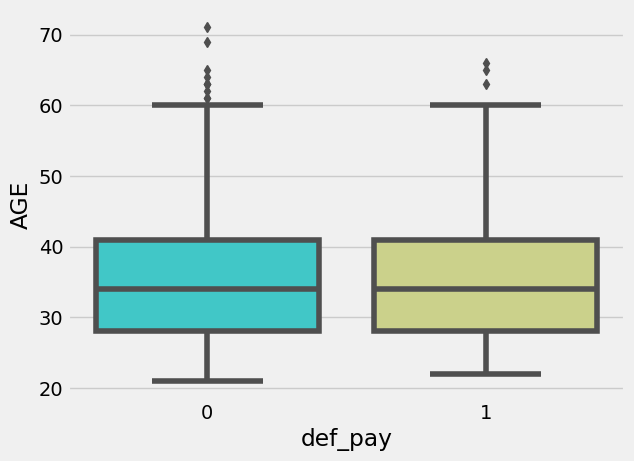

In [32]:
sns.boxplot(x='def_pay',y='AGE',data=dataset,palette='rainbow')


<Axes: xlabel='def_pay', ylabel='AGE'>

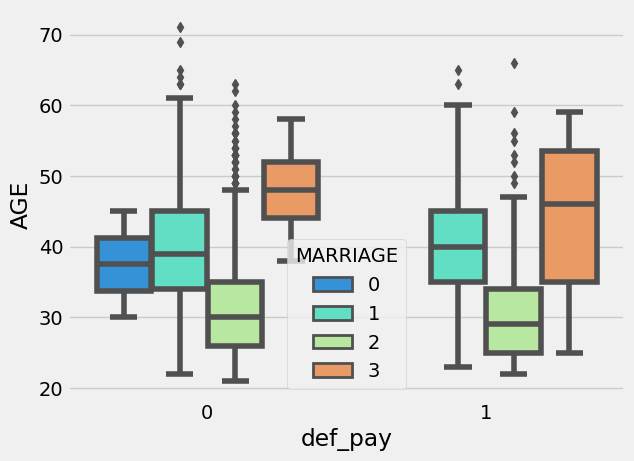

In [33]:
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=dataset,palette="rainbow")


<Axes: xlabel='def_pay', ylabel='AGE'>

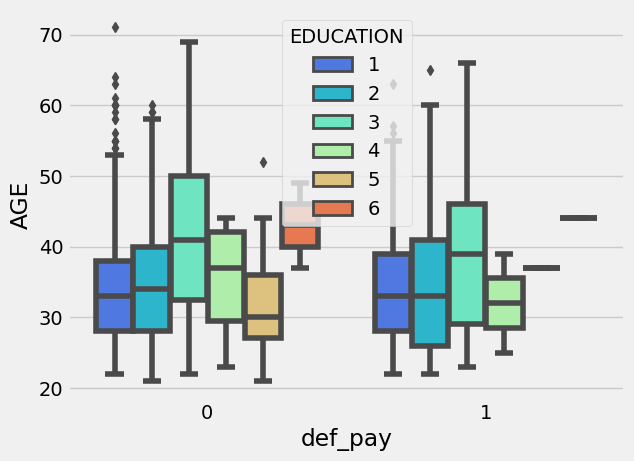

In [34]:
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=dataset,palette="rainbow" )


<Axes: xlabel='SEX', ylabel='LIMIT_BAL'>

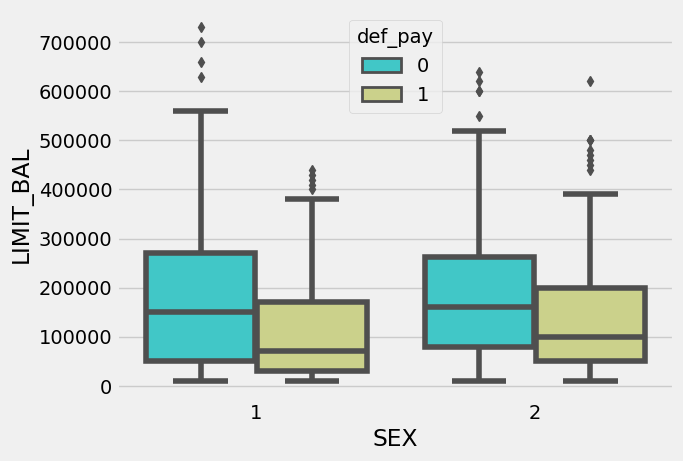

In [35]:
sns.boxplot(x='SEX',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")


<Axes: xlabel='EDUCATION', ylabel='LIMIT_BAL'>

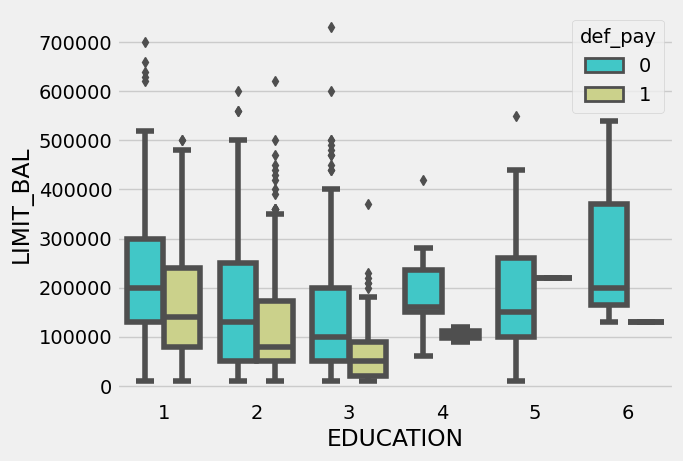

In [36]:
sns.boxplot(x='EDUCATION',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

<Axes: xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

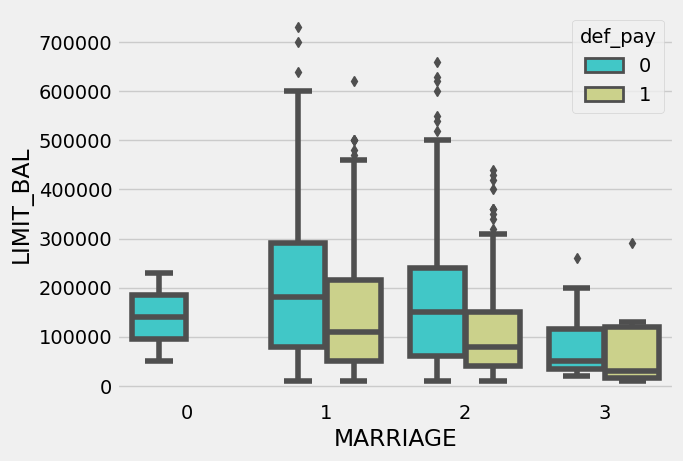

In [37]:
sns.boxplot(x='MARRIAGE',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")


<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

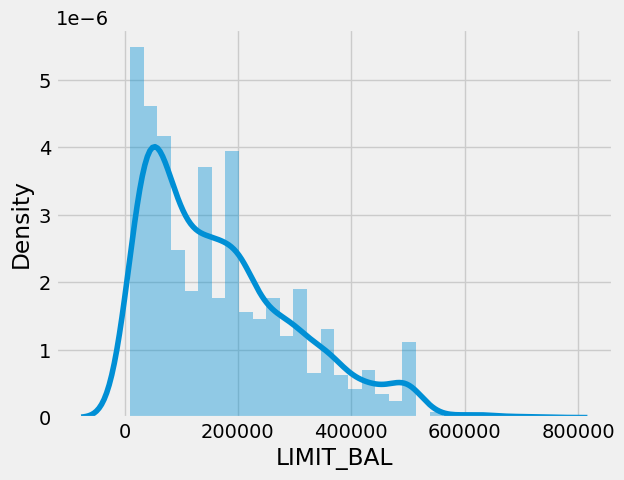

In [38]:
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)


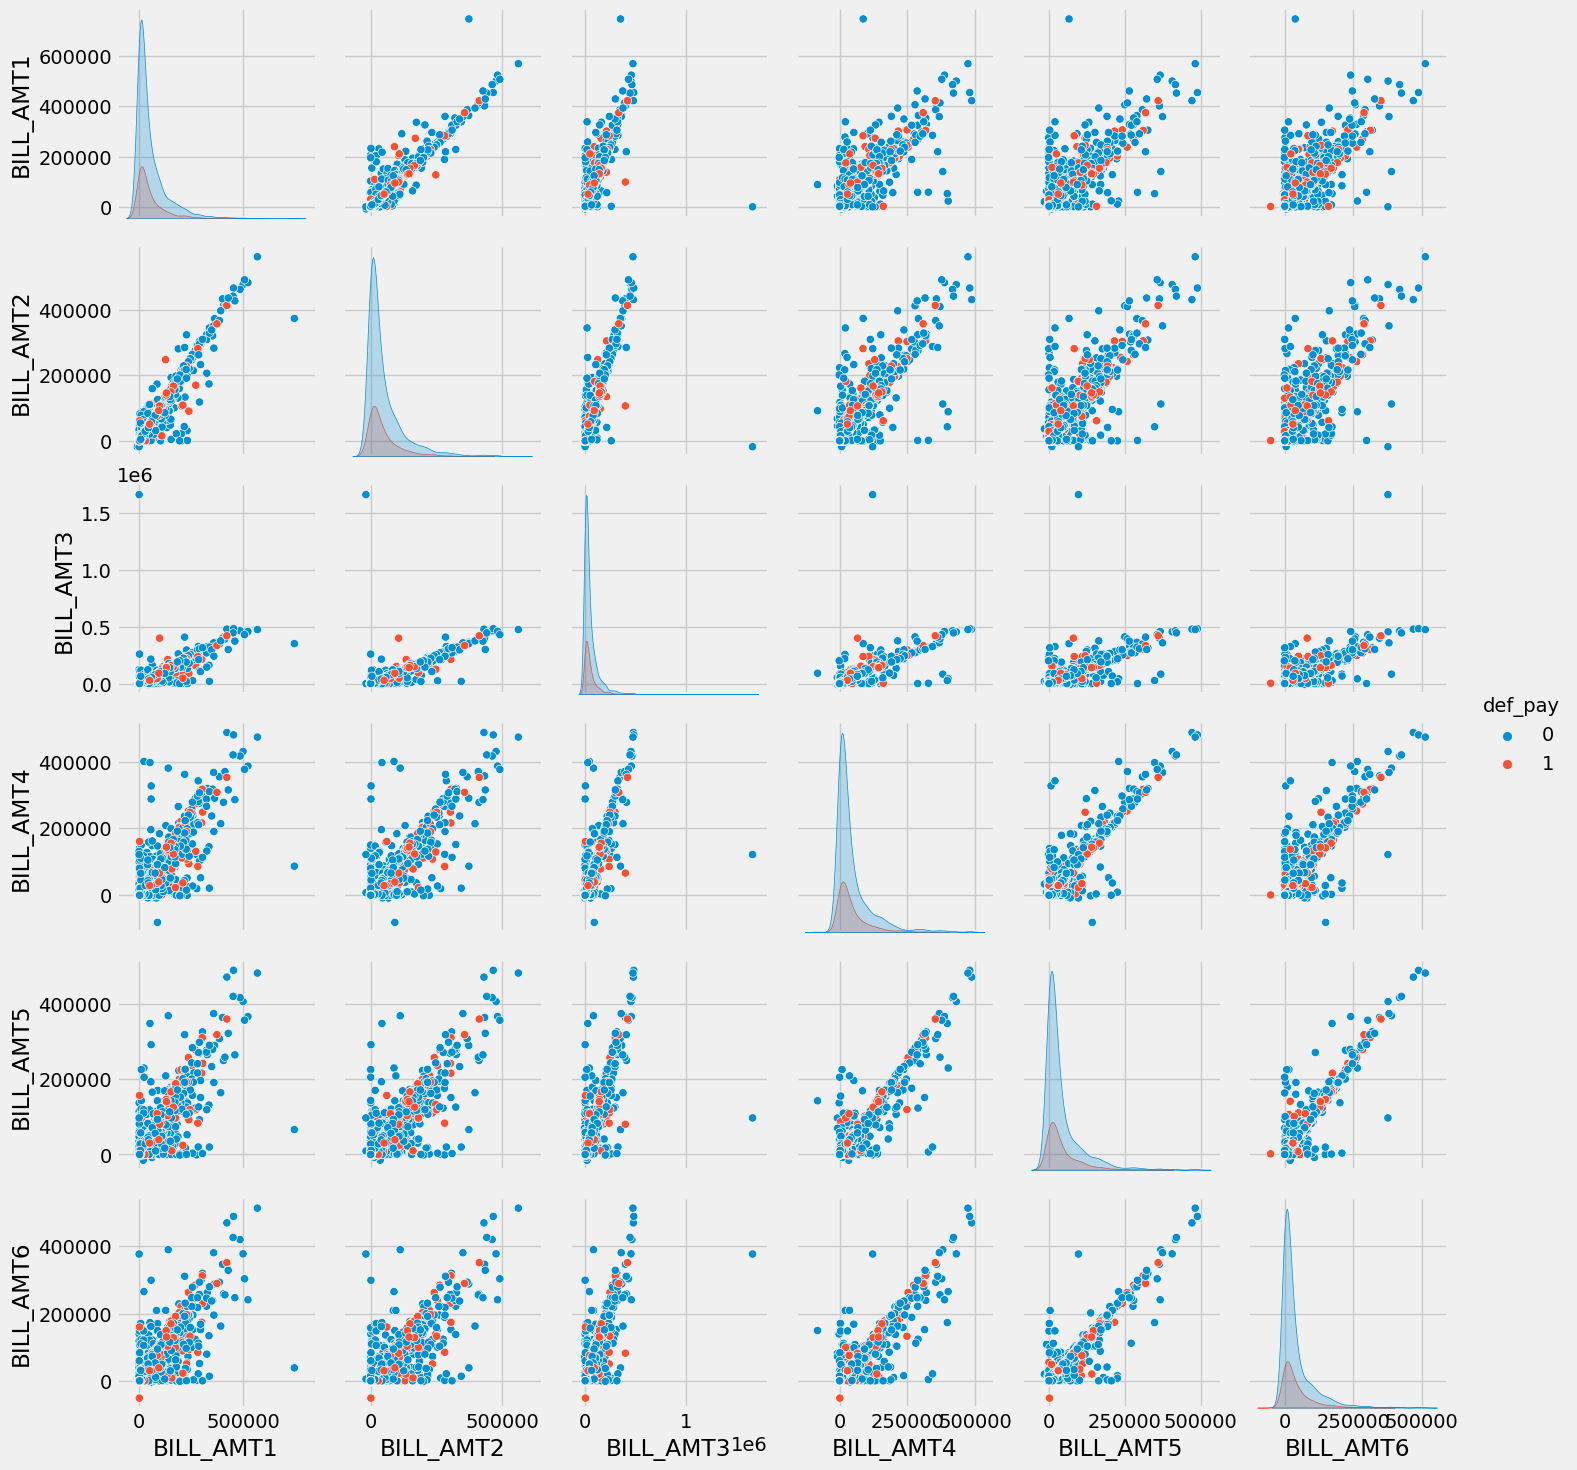

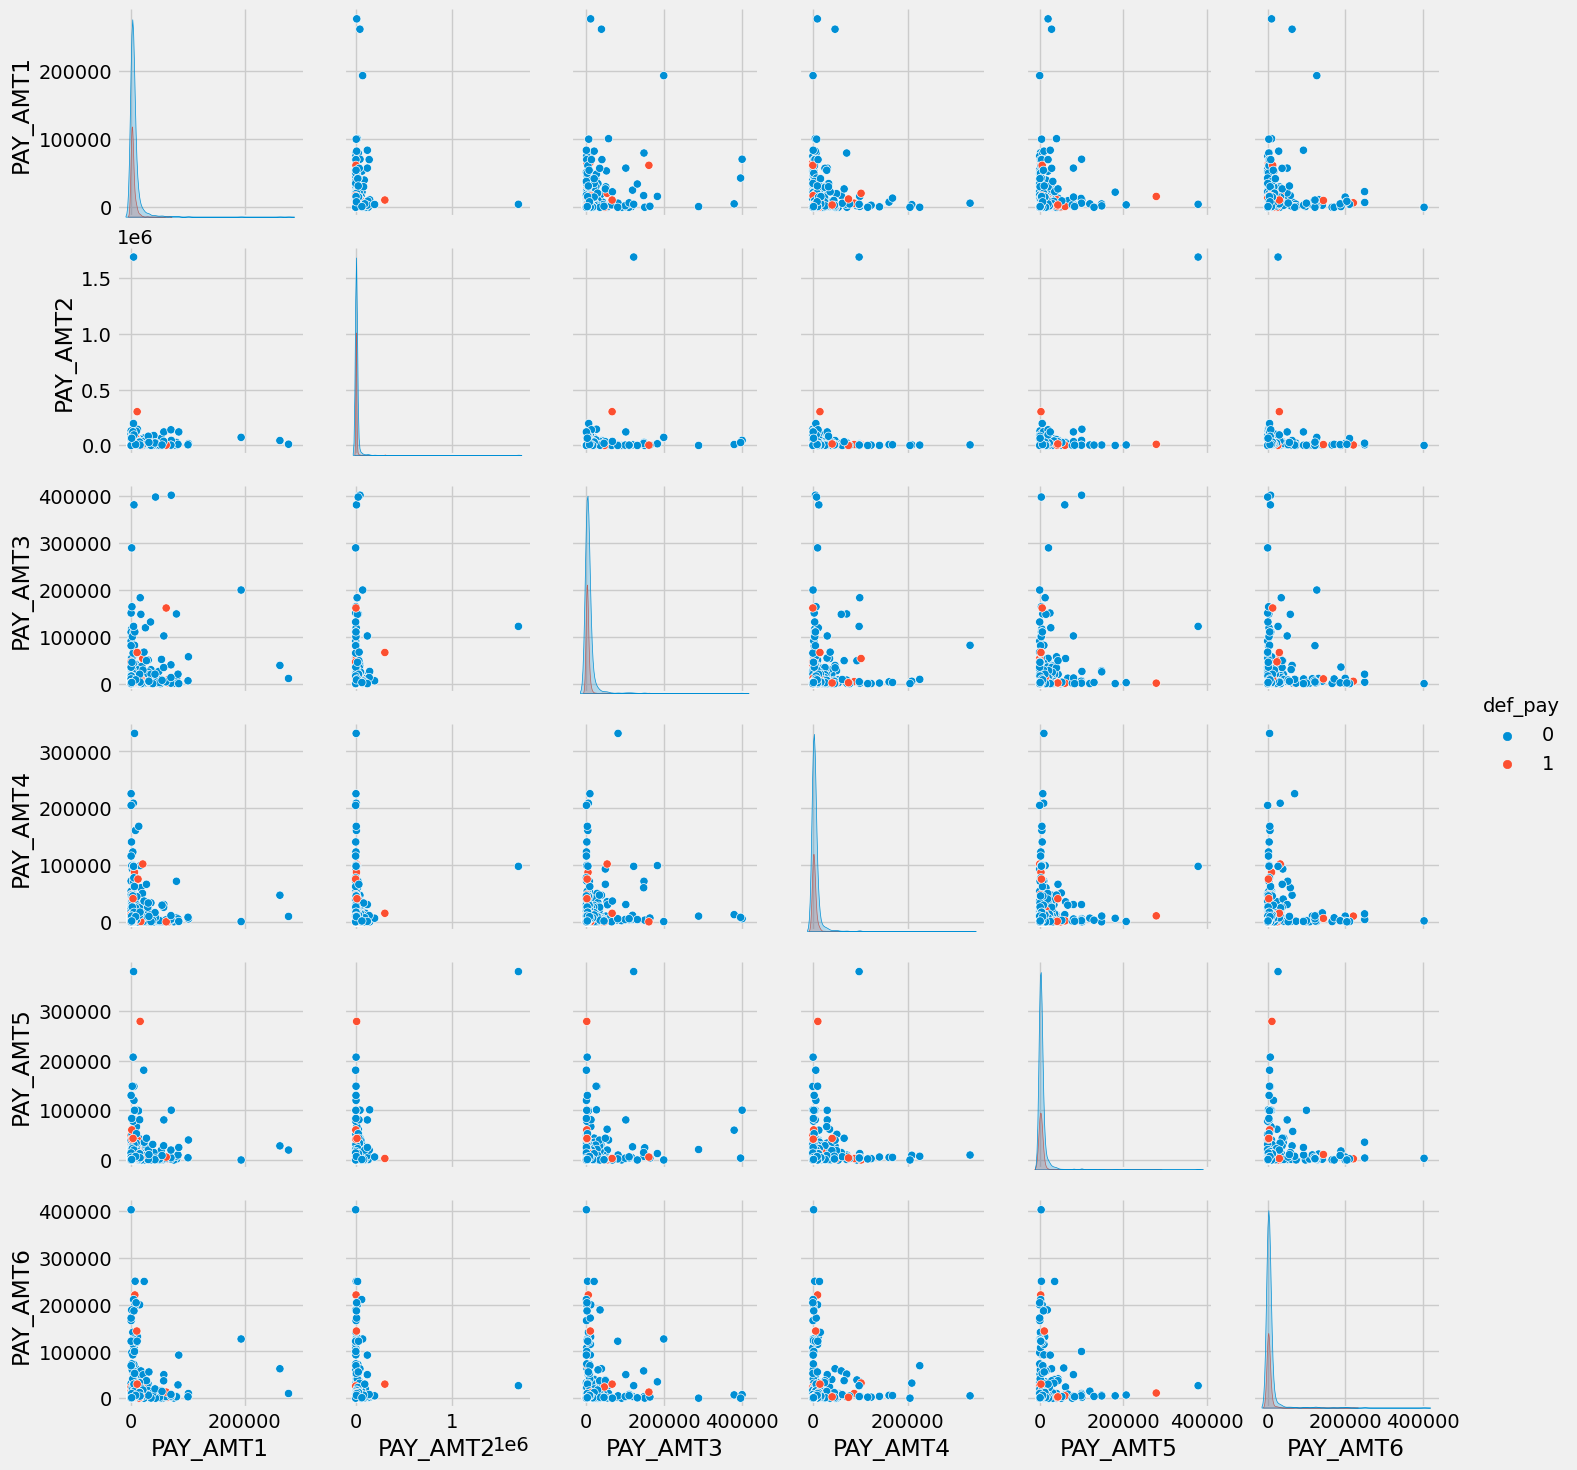

In [39]:
# plot columns with similar names to check the correlation

sns.pairplot(dataset, vars=dataset.columns[11:17], kind='scatter',hue= 'def_pay')
sns.pairplot(dataset, vars=dataset.columns[17:23],hue = 'def_pay')

**Step3: Observing Correlation between features of the Dataset**

In [40]:
correlation = dataset.corr()

<Axes: >

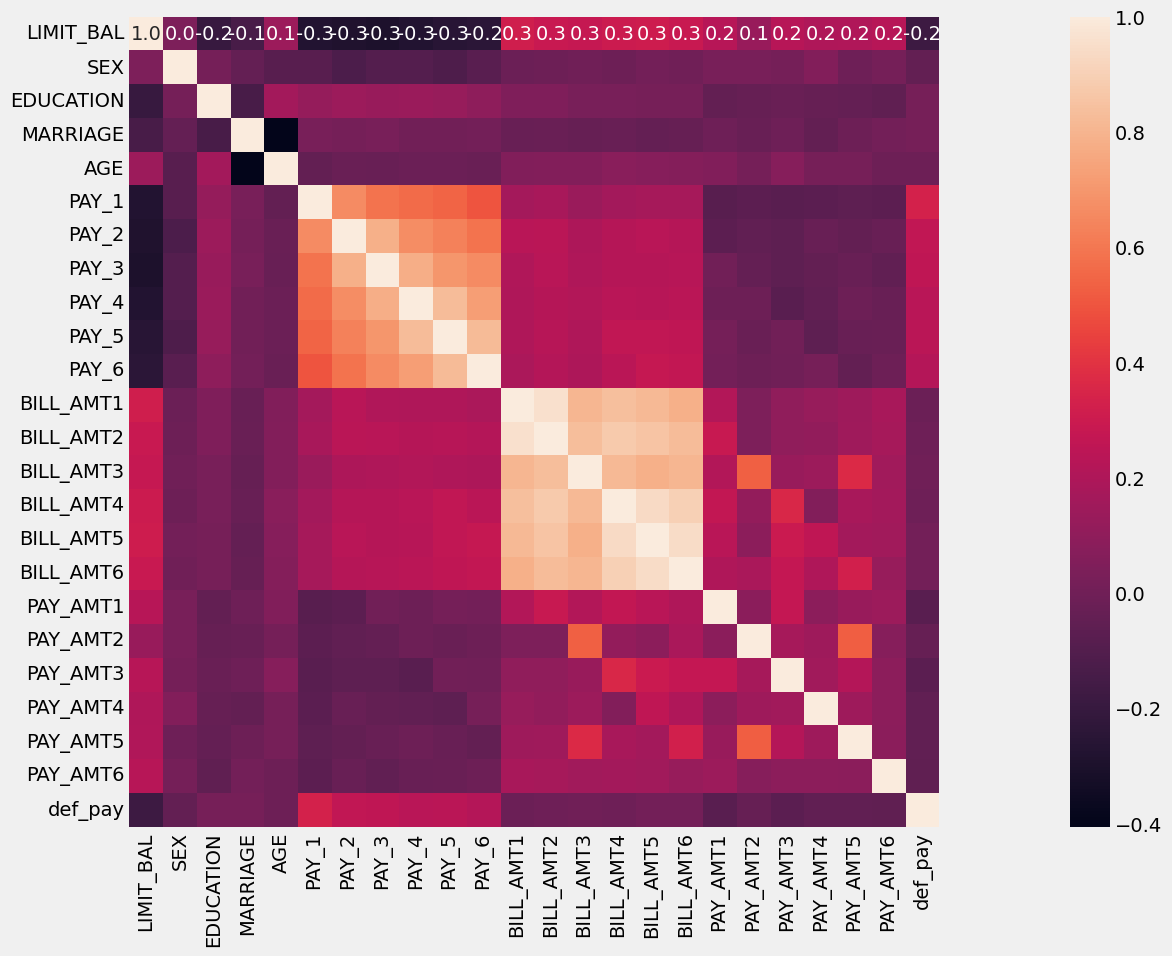

In [41]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  

**So it looks like the PAY_1, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.**

<Axes: title={'center': 'Correlation with Default'}>

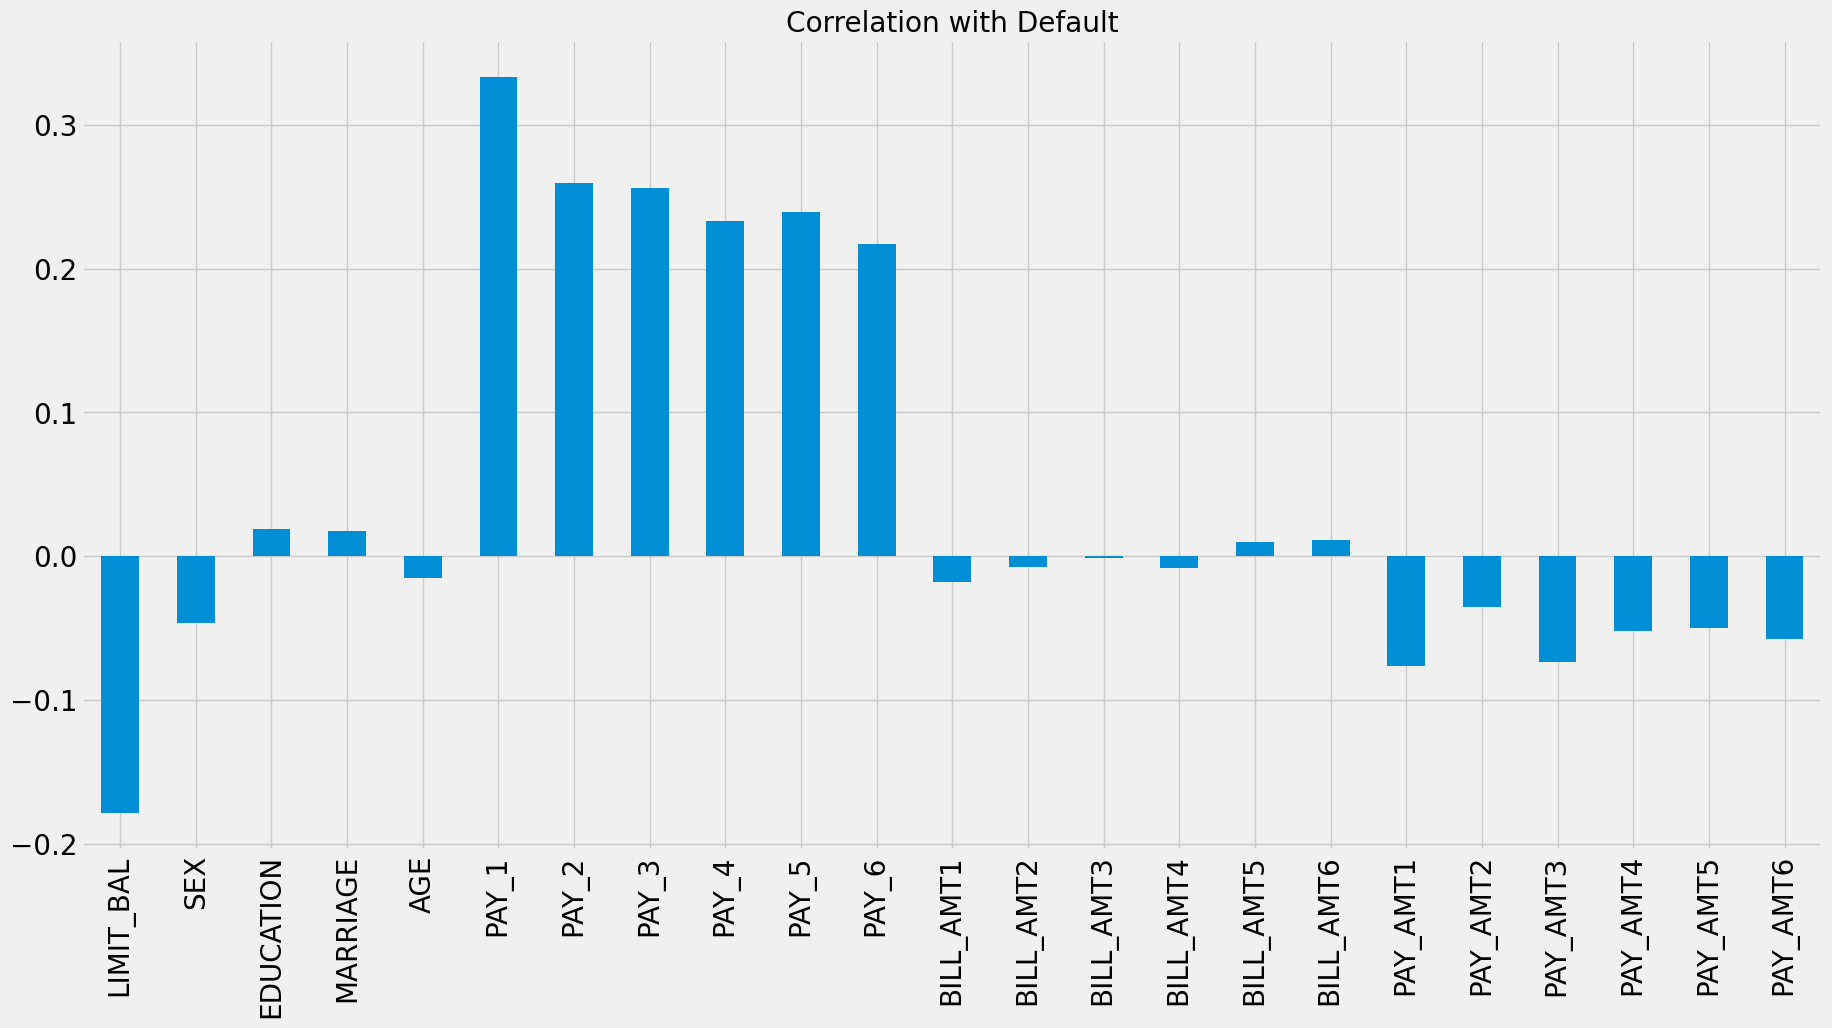

In [42]:
X = dataset.drop(['def_pay'],axis=1)
X.corrwith(dataset['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

**Based on the graph above, it appears that the feature most strongly negatively correlated with the target variable is "LIMIT_BAL." However, it's crucial not to hastily eliminate this feature because, in my opinion, it holds significant importance for making predictions. On the other hand, "ID" is deemed unimportant and has no relevance in the prediction process, so we'll consider removing it at a later stage.**

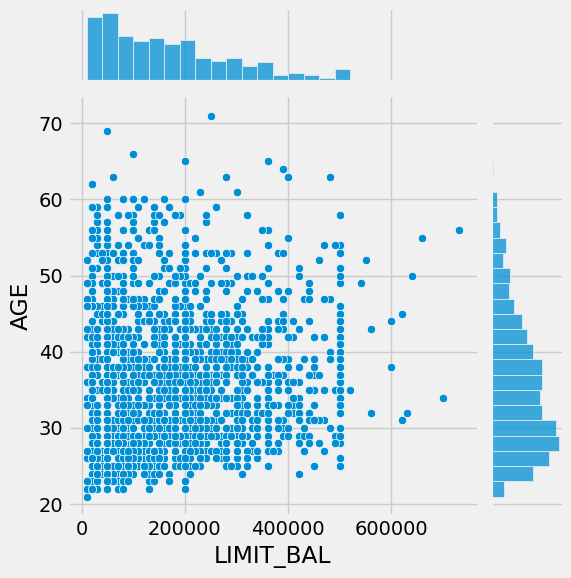

In [43]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=dataset,kind="scatter")

**Facet Grid**

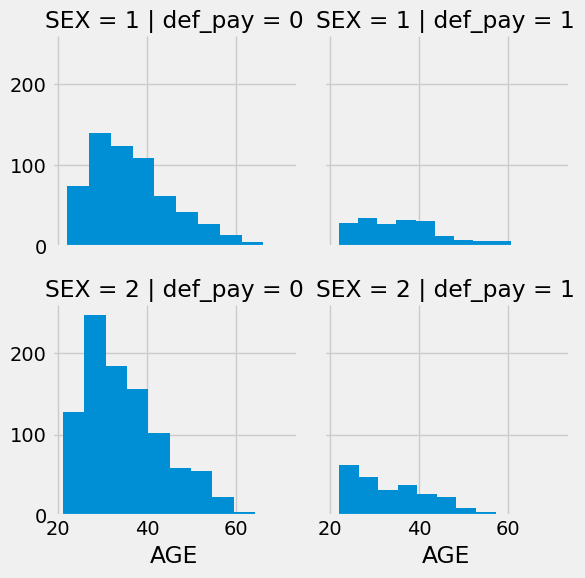

In [44]:
g = sns.FacetGrid(dataset, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')

**From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of people 30-40years**

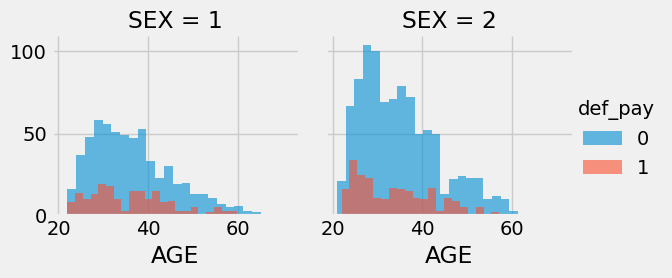

In [45]:
g = sns.FacetGrid(dataset, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

**From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of Female age between 30-40years**

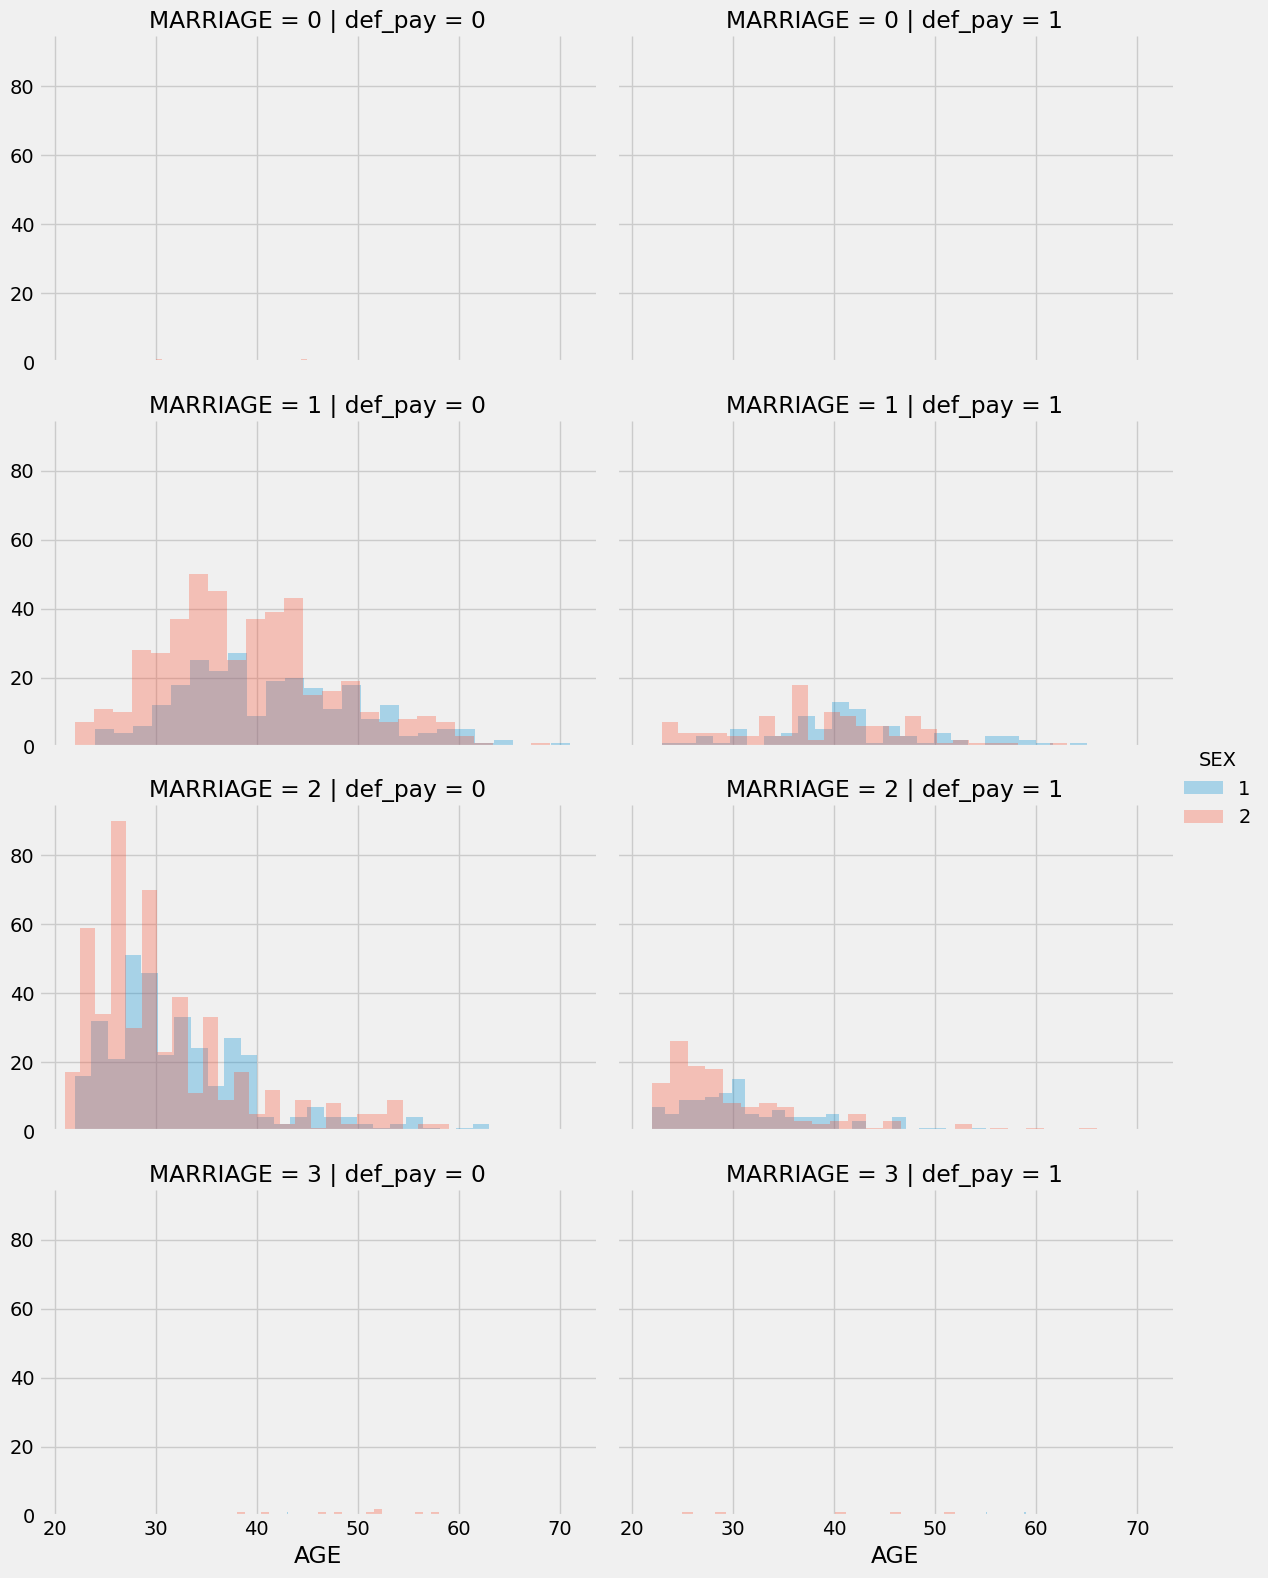

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the height and aspect ratio to increase the size of the grid
g = sns.FacetGrid(dataset, col='def_pay', row="MARRIAGE", hue='SEX', height=4, aspect=1.5)
g.map(plt.hist, 'AGE', alpha=0.3, bins=25)
g.add_legend()

# Show the plot
plt.show()


**Step4: Data Cleaning
EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented**.oc function

**MARRIAGE has a label 0 that is undocumented**



**Data Transformation**



**The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).**


**The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)**


**Thus is a good occasion to learn how to use the .loc function** 

In [47]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

EDUCATION
2    925
1    715
3    325
4     35
Name: count, dtype: int64

In [48]:
dataset['EDUCATION'].value_counts(dropna = False)


EDUCATION
2    925
1    715
3    325
4     35
Name: count, dtype: int64

In [49]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

MARRIAGE
2    1076
1     904
3      20
Name: count, dtype: int64

In [50]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,-1,-1,-2,-1,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,-1,-1,-1,0,-1,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [51]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
23296,160000,2,1,2,25,-1,0,-1,-1,0,...,2199,10856,0,1000,11426,2199,10000,0,9867,0
15149,250000,1,1,1,53,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
18667,50000,2,1,2,23,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3416,200000,2,2,1,37,0,0,0,0,0,...,191730,171269,151550,8017,8000,8000,9000,7000,6000,0
18715,420000,2,1,2,28,0,0,-1,0,0,...,65592,57438,31029,1010,64513,2420,1473,1062,1022,0


In [52]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()

PAY_6
0    1788
2     190
3      10
4       5
7       3
5       2
6       2
Name: count, dtype: int64

In [53]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,0,0,0,0,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,0,0,0,0,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


In [54]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
23296,160000,2,1,2,25,0,0,0,0,0,...,2199,10856,0,1000,11426,2199,10000,0,9867,0
15149,250000,1,1,1,53,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18667,50000,2,1,2,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3416,200000,2,2,1,37,0,0,0,0,0,...,191730,171269,151550,8017,8000,8000,9000,7000,6000,0
18715,420000,2,1,2,28,0,0,0,0,0,...,65592,57438,31029,1010,64513,2420,1473,1062,1022,0


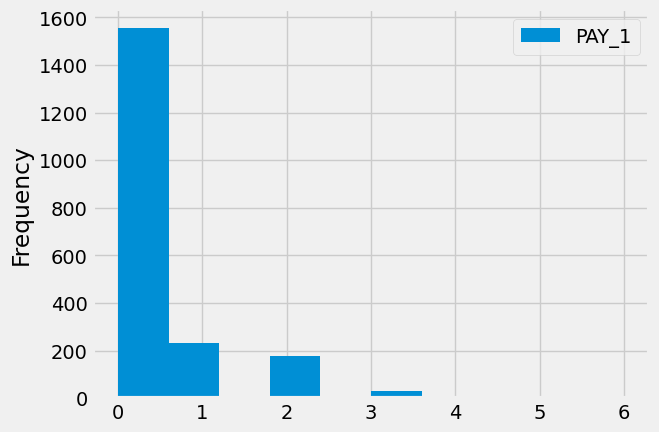

In [55]:
dataset.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [56]:
dataset['PAY_1'].describe()

count    2000.000000
mean        0.349000
std         0.734485
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: PAY_1, dtype: float64

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 10748 to 18715
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  2000 non-null   int64 
 1   SEX        2000 non-null   object
 2   EDUCATION  2000 non-null   int64 
 3   MARRIAGE   2000 non-null   int64 
 4   AGE        2000 non-null   int64 
 5   PAY_1      2000 non-null   int64 
 6   PAY_2      2000 non-null   int64 
 7   PAY_3      2000 non-null   int64 
 8   PAY_4      2000 non-null   int64 
 9   PAY_5      2000 non-null   int64 
 10  PAY_6      2000 non-null   int64 
 11  BILL_AMT1  2000 non-null   int64 
 12  BILL_AMT2  2000 non-null   int64 
 13  BILL_AMT3  2000 non-null   int64 
 14  BILL_AMT4  2000 non-null   int64 
 15  BILL_AMT5  2000 non-null   int64 
 16  BILL_AMT6  2000 non-null   int64 
 17  PAY_AMT1   2000 non-null   int64 
 18  PAY_AMT2   2000 non-null   int64 
 19  PAY_AMT3   2000 non-null   int64 
 20  PAY_AMT4   2000 non-null   int

In [58]:
dataset.SEX.nunique()

2

In [59]:
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000
mean,5153.111500,6.362411e+03,6096.214000,5091.073500,5043.292500,5738.555500
std,13065.162427,4.014712e+04,21880.625777,16197.840731,16448.820691,21310.318739
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,9.947500e+02,445.500000,328.250000,260.250000,166.750000
50%,2022.500000,2.031500e+03,1843.000000,1597.500000,1500.000000,1464.000000
75%,5000.000000,5.000000e+03,5000.000000,4295.500000,4207.750000,4000.000000
max,276698.000000,1.684259e+06,400972.000000,331788.000000,379267.000000,403500.000000


In [60]:
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000
mean,53341.091500,50172.804500,4.823936e+04,44390.095500,41502.586000,39643.917000
std,76676.065104,72959.306173,7.850584e+04,65827.281839,61928.132672,60472.016246
min,-8187.000000,-18088.000000,-9.032000e+03,-81334.000000,-15306.000000,-51443.000000
25%,3974.750000,3057.750000,3.048500e+03,2939.500000,2158.750000,1319.250000
50%,23410.000000,21378.500000,2.046300e+04,19454.000000,18652.000000,17621.500000
75%,70972.500000,65359.500000,6.056850e+04,53394.250000,51005.500000,49484.750000
max,746814.000000,562316.000000,1.664089e+06,487066.000000,489200.000000,513798.000000


In [61]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

**One Hot encoding for categorical variable**

In [62]:
#categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4',
                   #'PAY_5','PAY_6']
#dataset[categorical_vars] = dataset[categorical_vars].astype(str)
#dataset = pd.get_dummies(dataset,columns=categorical_vars,drop_first=True)
#dataset.head()

In [63]:
dataset.shape

(2000, 24)

In [64]:
dataset.columns = dataset.columns.map(str.lower)

In [65]:
dataset.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,310000,1,3,1,32,0,0,0,0,0,...,84373,57779,14163,8295,6000,4000,3000,1000,2000,0
12574,10000,2,3,1,49,0,0,0,0,2,...,1690,1138,930,0,0,2828,0,182,0,1
29677,50000,1,2,1,28,0,0,0,0,0,...,45975,1300,43987,0,46257,2200,1300,43987,1386,0
8857,80000,2,3,1,52,2,2,3,3,3,...,40748,39816,40607,3700,1600,1600,0,1600,1600,1
21099,270000,1,1,2,34,1,2,0,0,2,...,22448,15490,17343,0,4000,2000,0,2000,2000,0


**Step5: Feature Scaling of Numerical Attributes**

In [66]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
dataset[col_to_norm] = dataset[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [67]:
dataset.head(10)


,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
10748,1.050233,1,3,1,-0.378229,0,0,0,0,0,...,0.607543,0.262893,-0.421472,0.240538,-0.009029,-0.095826,-0.129128,-0.245872,-0.175478,0
12574,-1.229991,2,3,1,1.481197,0,0,0,0,2,...,-0.648831,-0.651960,-0.640356,-0.394515,-0.158517,-0.149403,-0.314384,-0.295614,-0.269353,1
29677,-0.925961,1,2,1,-0.815741,0,0,0,0,0,...,0.024083,-0.649344,0.071838,-0.394515,0.993958,-0.178111,-0.234107,2.368160,-0.204297,0
8857,-0.697939,2,3,1,1.809331,2,2,3,3,3,...,-0.055342,-0.027241,0.015930,-0.111248,-0.118654,-0.205540,-0.314384,-0.209386,-0.194253,1
21099,0.746203,1,1,2,-0.159473,1,2,0,0,2,...,-0.333412,-0.420150,-0.368873,-0.394515,-0.058859,-0.187254,-0.314384,-0.185062,-0.175478,0
17459,-0.241894,2,3,1,-0.596985,0,0,0,0,2,...,0.574934,0.379525,0.350731,-0.034690,-0.046277,0.311302,-0.314384,-0.172292,-0.161397,0
1477,0.214151,1,2,2,-1.034497,0,0,0,0,0,...,-0.431131,-0.466618,-0.546570,0.597455,-0.061749,-0.049655,-0.271158,-0.284790,-0.188949,0
5121,-0.165886,1,2,2,0.168661,0,0,0,0,0,...,0.312288,0.327888,0.319948,-0.203118,-0.096230,-0.105883,-0.178530,-0.185062,-0.175478,0
18339,-1.153983,2,2,2,-1.472009,0,0,0,0,0,...,-0.375077,-0.350245,-0.324825,-0.164839,-0.083748,-0.141540,-0.190880,-0.245750,-0.232601,0


In [68]:
dataset.tail(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
18551,-0.165886,2,1,2,-1.253253,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,1
16366,0.974226,2,1,2,-0.050095,0,0,0,0,0,...,-0.661002,-0.655982,-0.643515,-0.368179,-0.136318,-0.238042,-0.259487,-0.261743,-0.184537,0
12273,1.050233,2,1,2,-0.706363,0,0,0,0,0,...,-0.114983,-0.040631,-0.121407,-0.241398,-0.118155,-0.217791,-0.143208,-0.215467,-0.198947,0
19325,-0.089879,2,3,1,0.278039,0,0,0,0,0,...,-0.671365,-0.666998,-0.652315,-0.378667,-0.153360,-0.269219,-0.301602,-0.294094,-0.259637,0
553,-0.925961,1,1,1,2.246843,0,0,0,0,0,...,-0.236254,-0.179343,-0.159898,-0.203118,-0.121145,-0.228397,-0.190880,-0.215467,-0.221617,1
23296,-0.089879,2,1,2,-1.143875,0,0,0,0,0,...,-0.641097,-0.494997,-0.655739,-0.317956,0.126157,-0.178157,0.303136,-0.306682,0.193778,0
15149,0.594188,1,1,1,1.918709,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,1
18667,-0.925961,2,1,2,-1.362631,0,0,0,0,0,...,-0.674511,-0.670341,-0.655739,-0.394515,-0.158517,-0.278682,-0.314384,-0.306682,-0.269353,0
3416,0.214151,2,2,1,0.168661,0,0,0,0,0,...,2.238840,2.095960,1.851006,0.219255,0.040800,0.087030,0.241384,0.118987,0.012272,0


**Step6: Spiliting Dataset into training(70%) and test set(30%)**


In [69]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [70]:
X_train.shape

(1400, 23)

In [71]:
X_test.shape

(600, 23)

**Step7: Applying Machine Learning Algorithm for Classification Problem**

**Logistic Regression**

Logistic Regression is a statistical technique employed for classification tasks where the goal is to model a categorical dependent variable (Y) based on one or more independent variables (X). This method involves creating a mathematical model that produces output values between 0 and 1 to represent the probability of various outcomes. Logistic Regression relies on the utilization of the Sigmoid Function, also known as the Logistic Function, for this purpose.

In [72]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [73]:
y_pred = logmodel.predict(X_test)


In [77]:
# Convert string labels to integers
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Calculate ROC AUC
roc = roc_auc_score(y_test, y_pred)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score with pos_label=1
prec = precision_score(y_test, y_pred, pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Create a DataFrame with the results
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, roc]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

print(results)





                 Model  Accuracy  Precision    Recall  F1 Score      ROC
0  Logistic Regression  0.826667   0.694915  0.322835   0.44086  0.64239


**Stochastic Gradient Descent**

**Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.It is on of the Gradient Descent Algorithm.It uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.**

In [78]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log_loss', penalty='l1', learning_rate='optimal', random_state=1)
sgd.fit(X_train, y_train)


SGDClassifier(loss='log_loss', penalty='l1', random_state=1)

In [79]:
y_pred = sgd.predict(X_test)

In [80]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc = roc_auc_score(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc, prec, rec, f1, roc]],
                     columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
model


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.815,0.722222,0.204724,0.319018,0.591791


**K-Nearest Neighbour**



KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

Load the data
Initialise the value of k
For getting the predicted class, iterate from 1 to total number of training data points
Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
Sort the calculated distances in ascending order based on distance values
Get top k rows from the sorted array
Get the most frequent class of these rows
Return the predicted class
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [81]:
from sklearn.neighbors import KNeighborsClassifier


In [82]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

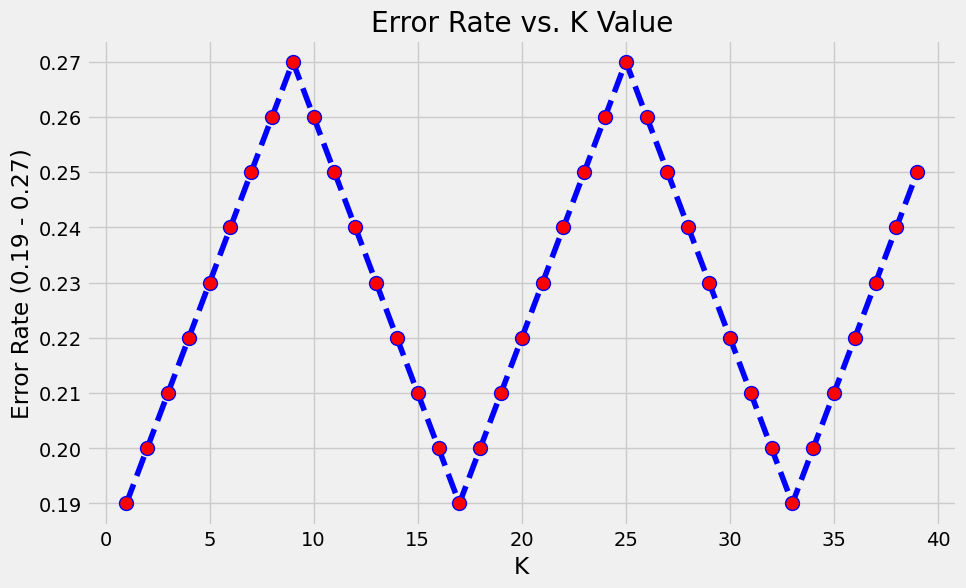

In [83]:
plt.figure(figsize=(10,6))

# Replace error_rate_list with your actual list of error rates
error_rate_list = [0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25]

# Plot the error rates against k values
plt.plot(range(1, 40), error_rate_list, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate (0.19 - 0.27)')

# Show the plot
plt.show()


In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [85]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [86]:
y_pred = knn.predict(X_test)

In [87]:
y_pred = y_pred.astype(int)

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.811667,0.645833,0.244094,0.354286,0.604077


**Support Vector Machine**

Support Vector Machine (SVM) is a versatile model used in both classification and regression tasks. It's capable of handling linear as well as non-linear problems. The SVM algorithm constructs a line or a hyperplane to distinguish between classes, employing various kernel techniques such as 'linear' and 'rbf' (Gaussian). The primary objective of SVM is to create a decision boundary that maximizes the separation between the two classes, essentially creating the widest possible gap between them.

In [88]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [89]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [90]:
y_pred = y_pred.astype(int)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

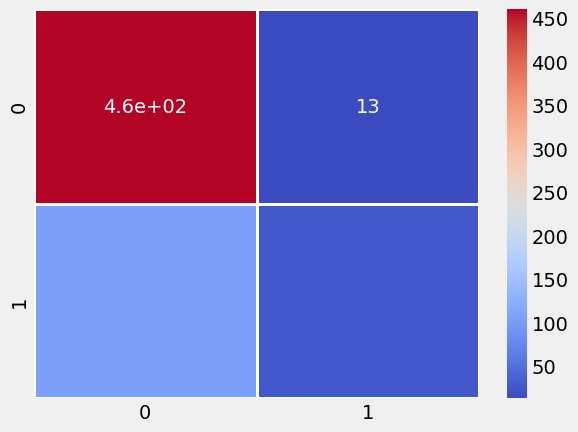

In [91]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [92]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.806667,0.648649,0.188976,0.292683,0.580746


**Gaussian Naive Bayes**

In [93]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [94]:
y_pred =naive_bayes.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix
y_pred = y_pred.astype(int)

cm = confusion_matrix(y_test, y_pred)

In [96]:
cm

array([[391,  82],
       [ 53,  74]], dtype=int64)

In [97]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.775,0.474359,0.582677,0.522968,0.704658


**Decision Tree Classification**

The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

**Advantages of Decision Trees**

Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

**Disadvantages of Decision Trees**

Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.

In [98]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [99]:
dct.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [100]:
y_pred = dct.predict(X_test)


In [101]:
from sklearn.metrics import confusion_matrix
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_test, y_pred)

In [102]:
cm

array([[392,  81],
       [ 82,  45]], dtype=int64)

In [103]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.728333,0.357143,0.354331,0.355731,0.591542


**Random Forest Classification**

Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.


**Step1:-** Pick at random K data points from the training set

**Step2:-** Build the Decision tree associated to these K data points



**Step3:-** Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

**Step4:-** For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [105]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [106]:
y_pred = rfc.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_test, y_pred)

In [108]:
cm

array([[452,  21],
       [ 91,  36]], dtype=int64)

In [109]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.813333,0.631579,0.283465,0.391304,0.619534


**XGBOOST classifier**

It is Gradient Boosting Algorithm

In [110]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [111]:


from xgboost import XGBClassifier

y_train = y_train.astype(int)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
y_pred =xgb.predict(X_test)

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [114]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.785,0.486842,0.291339,0.364532,0.604443


**Step8: Model Optimization using Grid Search and K-Fold Cross validation**

There is a better way that I know to get your parameters right, which is to use GridSearchCV. Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters.

**1)Grid Search on Logistic Regression Model**

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logmodel_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'penalty': ['l1', 'l2']
}

# Create a LogisticRegression model
logistic_regression = LogisticRegression()

# Create a GridSearchCV object
grid_search_log = GridSearchCV(estimator=logistic_regression, param_grid=logmodel_params, scoring='accuracy', cv=10, n_jobs=-1)

# Fit the grid search to your training data
grid_search_log.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [116]:
best_accuracy = grid_search_log.best_score_

In [117]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.82


In [118]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 10, 'class_weight': None, 'penalty': 'l2'}

In [119]:
y_pred_log = grid_search_log.predict(X_test)

In [120]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [121]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.825,0.683333,0.322835,0.438503,0.641333


**2)Grid Search on Stochastic Gradient Descent**

In [122]:
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(X_train,y_train)

In [123]:
best_accuracy_1 = grid_search_sgd.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8150000000000001


In [124]:
best_parameters_2 = grid_search_sgd.best_params_
best_parameters_2

{'alpha': 0.01, 'class_weight': None}

In [125]:
y_pred_sgd = grid_search_sgd.predict(X_test)


In [126]:
sgd_prob = grid_search_sgd.predict_proba(X_test)

In [127]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have computed the evaluation metrics for your SGD model
roc = roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)

# Create a DataFrame for the current model's results
model = pd.DataFrame([['Stochastic Gradient Descent Tuned', acc, prec, rec, f1, roc]],
                     columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Concatenate the current model's results with model_results
model_results = pd.concat([model, model_results], ignore_index=True)

# Display the model_results DataFrame
print(model_results)


                               Model  Accuracy  Precision    Recall  F1 Score  \
0  Stochastic Gradient Descent Tuned     0.815   0.637931  0.291339  0.400000   
1          Logistic Regression Tuned     0.825   0.683333  0.322835  0.438503   

        ROC  
0  0.623471  
1  0.641333  


<Axes: >

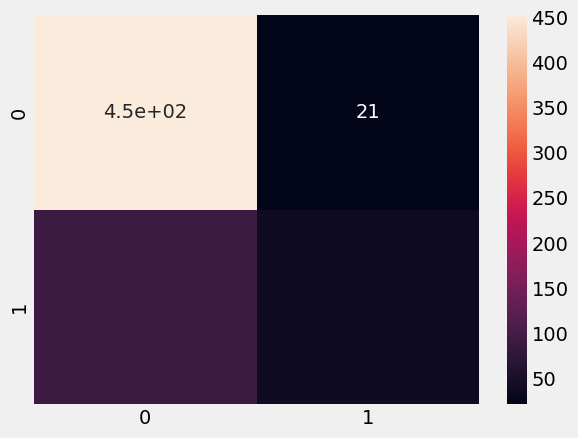

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm,annot=True)

**3)Grid Search on SVM model w**

In [166]:
scv_params = [{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']},
               {'C':[0.001,0.01,0.1,1,10,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.0001]}]
               

In [167]:
grid_search_1 = GridSearchCV(estimator=scv,param_grid=scv_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_1 = grid_search_1.fit(X_train,y_train)

In [168]:
best_accuracy_1 = grid_search_1.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8114285714285716


In [169]:
best_parameters = grid_search_1.best_params_
best_parameters

{'C': 0.01, 'kernel': 'linear'}

In [170]:
y_pred_svc =grid_search_1.predict(X_test)

In [171]:
roc=roc_auc_score(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

In [172]:

model =  pd.DataFrame([['SVC MODEL TUNED', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

# Concatenate the current model's results with model_results
model_results = pd.concat([model, model_results], ignore_index=True)



model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVC MODEL TUNED,0.808333,0.642857,0.212598,0.319527,0.590443
1,XGBOOST Tuned,0.801667,0.560606,0.291339,0.383420,0.615014
2,Random Forest Tuned,0.815000,0.633333,0.299213,0.406417,0.626350
3,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
4,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
5,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
6,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872


**4)Grid Search on KNN Classifier**

We will be using the optimsed-for-performance implemented function of KNN provided by the scikit-learn package. We will also loop over k=1 to 30 and observe the recall in all these cases to find the best suitable value of K for our problem.

In [138]:
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

In [140]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [141]:
best_accuracy_1 = grid_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8107142857142857


In [142]:
best_parameters = grid_search.best_params_
best_parameters

{'leaf_size': 1, 'n_neighbors': 24, 'weights': 'uniform'}

In [143]:
y_pred_KNN = grid_search.predict(X_test)

In [144]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have computed the evaluation metrics for your KNN model
roc = roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)

# Create a DataFrame for the current model's results
model = pd.DataFrame([['KNN Model Tuned', acc, prec, rec, f1, roc]],
                     columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Initialize an empty DataFrame if model_results doesn't exist
if 'model_results' not in globals():
    model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Concatenate the current model's results to the model_results DataFrame
model_results = pd.concat([model_results, model], ignore_index=True)

# Display the model_results DataFrame
print(model_results)



                               Model  Accuracy  Precision    Recall  F1 Score  \
0  Stochastic Gradient Descent Tuned  0.815000   0.637931  0.291339  0.400000   
1          Logistic Regression Tuned  0.825000   0.683333  0.322835  0.438503   
2                    KNN Model Tuned  0.803333   0.628571  0.173228  0.271605   

        ROC  
0  0.623471  
1  0.641333  
2  0.572872  


**5)Grid Search on Decision Tree w**

In [145]:
#dct_param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)

In [146]:
best_accuracy_1 = grid_search_dt.best_score_

In [147]:
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8242857142857142


In [148]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [149]:
y_pred_dct = grid_search_dt.predict(X_test)

In [150]:

roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)


In [151]:
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# Concatenate the current model's results with model_results
model_results = pd.concat([model, model_results], ignore_index=True)



model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
1,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
2,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
3,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872


**6)Grid Search on Random Forest Classifier w**

In [152]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)


In [153]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.822857142857143


In [154]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': None, 'criterion': 'gini', 'n_estimators': 600}

In [155]:
y_pred_rf = grid_search_rf.predict(X_test)

In [157]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)


In [159]:


model =  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# Concatenate the current model's results with model_results
model_results = pd.concat([model, model_results], ignore_index=True)



model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Tuned,0.815000,0.633333,0.299213,0.406417,0.626350
1,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
2,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
3,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
4,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872


**7)Grid Search on XGBOOST Classifier w**

In [160]:
param_grid_xgb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
grid_seaech_xgb = grid_search_xgb.fit(X_train,y_train)

In [161]:
best_accuracy_1 = grid_search_xgb.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8157142857142856


In [162]:
best_parameters_2 = grid_search_xgb.best_params_
best_parameters_2

{'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 50}

In [163]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [164]:
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

In [165]:

model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# Concatenate the current model's results with model_results
model_results = pd.concat([model, model_results], ignore_index=True)



model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Tuned,0.801667,0.560606,0.291339,0.383420,0.615014
1,Random Forest Tuned,0.815000,0.633333,0.299213,0.406417,0.626350
2,Decision Tree Tuned,0.828333,0.714286,0.314961,0.437158,0.640567
3,Stochastic Gradient Descent Tuned,0.815000,0.637931,0.291339,0.400000,0.623471
4,Logistic Regression Tuned,0.825000,0.683333,0.322835,0.438503,0.641333
5,KNN Model Tuned,0.803333,0.628571,0.173228,0.271605,0.572872


**ROC Curve**

**Receiver Operating Characteristic(ROC)** summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate.

ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.



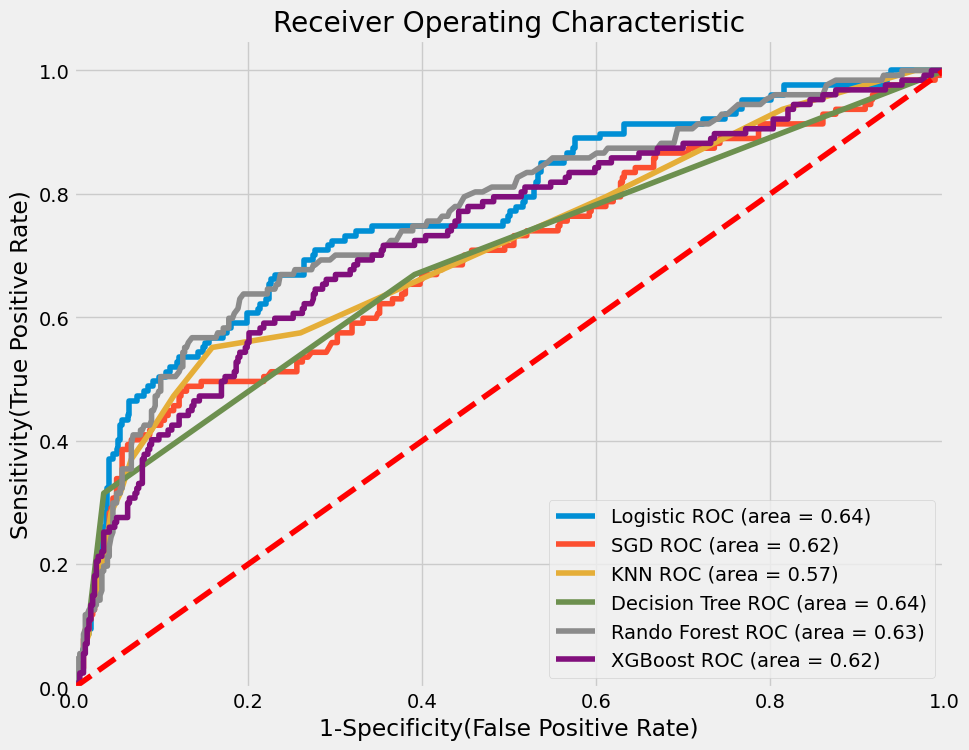

In [173]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_log_p =grid_search_log.predict_proba(X_test)[:,1]
y_pred_sgd_p =grid_search_sgd.predict_proba(X_test)[:,1]
#y_pred_svc_p =grid_search_1.predict_proba(X_test)[:,1]
y_pred_knn_p =grid_search.predict_proba(X_test)[:,1]
y_pred_dt_p =grid_search_dt.predict_proba(X_test)[:,1]
y_pred_rf_p =grid_search_rf.predict_proba(X_test)[:,1]
y_pred_xgb_p =grid_search_xgb.predict_proba(X_test)[:,1]

model = [grid_search_log,grid_search_sgd,grid_search,grid_search_dt,grid_search_rf,grid_search_xgb]

models=[y_pred_log_p,y_pred_sgd_p,y_pred_knn_p,y_pred_dt_p,y_pred_rf_p,y_pred_xgb_p]
label=['Logistic','SGD','KNN','Decision Tree','Rando Forest','XGBoost']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(6)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**For Model Evaluation we are referreing Confusion Matrix**

After we train a logistic regression model on some training data, we will evaluate the performance of the model on some test data. For this, we use the Confusion Matrix

the accuracy of the model : - ( TP + TN ) / Total

Here, TP stands for True Positive which are the cases in which we predicted yes and the actual value was true. TN stands for True Negative which are the cases in which we predicted no and the actual value was false.FP stands for False Positive which are the cases which we predicted yes and the actual value was False.FN stands for False Negative which are the cases which we predicted No and the actual value was true.

**Conclusion**

1)Using a **Logistic Regression** classifier, we can predict with **82.5% accuracy**, whether a customer is likely to default next month.

2)Using a **Stochastic Gradient Descent** classifier, we can predict with **83.33% accuracy**, whether a customer is likely to default next month.

3)Using a **Support Vector Machine** classifier, we can predict with **80.83% accuracy**, whether a customer is likely to default next month.

4)Using a **K-Nearest Neighbour** classifier, we can predict with **80.83% accuracy**, whether a customer is likely to default next month.

5)Using a **Decision Tree** classifier, we can predict with **82.83% accuracy**, whether a customer is likely to default next month.

6)Using a **Random Forest** classifier, we can predict with **81% accuracy**, whether a customer is likely to default next month.

7)Using a **XGBOOST** classifier, we can predict with **82.16% accuracy**, whether a customer is likely to default next month.

The strongest predictors of default are the **PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).**

**We found that using Stochastic Gradient Descent and Decision Tree are better.**

**Demographics:** we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.